<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Rastrigin_function(gradient_descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from helpers import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import minimize
from typing import Callable

def gd(**kw):
    kwd = kw_defaults(kw)

    #REQUIRED FIELDS
    f = kw['f']
    g = kw['grad']
    x0 = kw['x0']

    #OPTIONAL FIELDS
    tau = kwd('tau', 1e-15)
    c_armijo = kwd('c_armijo', 1e-4)
    c_curvature = kwd('c_curvature', 1e-2)
    alpha = kwd('alpha', 1.0)
    mode = kwd('mode', 'backtracking')
    max_iter = kwd('max_iter', 100)
    verbose = kwd('verbose', True)
    stochastic = kwd('stochastic', lambda x,it: np.zeros(x0.shape))

    #Setup iteration variables
    d = len(x0)
    x = x0
    beta = alpha

    #Setup return values
    x_history = [x]
    f_history = [f(x)]
    g_history = [g(x)]
    g_norm_history = [np.linalg.norm(g_history[-1])]
    r_history = []

    sep = '     '
    print('it: 0%sx: [%s]%sf: %.5e%sgrad_norm: %.5e%sgrad: [%s]%sstep_length: %.5e'%(
        sep,
        ','.join(['%.5e'%e for e in x]), sep,
        f_history[-1], sep,
        g_norm_history[-1], sep,
        ','.join(['%.5e'%e for e in g_history[-1]]), sep,
        beta))

    it = 0
    while( it < max_iter ):
        phi = lambda gamma : f(x - gamma * g(x))
        phi_prime = lambda gamma : # TODO: implement phi'
        armijo = lambda gamma : #TODO: implement armijo condition
        curv = #TODO: implement curvature condition

        beta = alpha

        if( mode == 'backtracking' ):
            #TODO: implement Wolfe condition violation condition
            while( ):
                #TODO: implement backtracking step
        elif( mode == 'exact' ):
            #Exact line search done...note that we have
            #    call an external package to solve an auxiliary opt. problem.
            tmp = minimize(phi, 0.0)
            beta = tmp['x'][0]

        #TODO: implement update term...remember the stochastic term!
        #    --> if you want stochasticity off, then just set that term to 0!
        x =

        #Update loop variables
        x_history.append(x)
        f_history.append(f(x))
        g_history.append(g(x))
        g_norm_history.append(np.linalg.norm(g_history[-1]))
        r_history.append(abs(f_history[-2] - f_history[-1]))

        it += 1

        #Print debug info
        if( verbose ):
            print('it: %d%sx: [%s]%sf: %.5e%sgrad_norm: %.5e%sgrad: [%s]%sstep_length: %.5e%sr: %.5e'%(
                it, sep,
                ','.join(['%.5e'%e for e in x]), sep,
                f_history[-1], sep,
                g_norm_history[-1], sep,
                ','.join(['%.5e'%e for e in g_history[-1]]), sep,
                beta,sep,
                r_history[-1]))

        if( g_norm_history[-1] < tau ):
            print('Gradient norm = %.5e < %.5e...breaking'%(np.linalg.norm(g(x)), tau))
            break
    #return values
    return {'x' : x_history[-1],
        'val' : f_history[-1],
        'x_history': x_history,
        'f_history': f_history,
        'grad_norm_history': g_norm_history,
        'grad_history': g_history,
        'residual' : r_history,
        'iterations': it}

#Make plots -- no modifications needed
def plot_progress(f, x_history, output_name, x_box, y_box, num_levels):
    if( len(x_history) == 0 ):
        raise(Exception('Empty history list...cannot plot'))

    if( len(x_history[0]) > 2 ):
        raise(Exception('Domain of dimension %d > 2...cannot plot'%(len(x_history[0]))))

    if( len(x_history[0]) == 1 ):
        x_history = np.ndarray.flatten(np.array(x_history))
        x_min = min(x_history)
        x_max = max(x_history)
        x = np.array([np.array([e]) for e in np.linspace(x_min, x_max, N)])
        colors = cm.rainbow(np.linspace(0,1,len(x_history)))
        for xx, c in zip(x_history, colors):
            plt.scatter( xx, f(np.array([xx])), color=c )
        plt.plot(np.ndarray.flatten(x),np.array(list(map(f,x))))
        plt.xlabel('X')
        plt.ylabel('f')
        plt.savefig('%s.pdf'%output_name.replace('.pdf',''))
    else:
        x_coords = [e[0] for e in x_history]
        y_coords = [e[1] for e in x_history]

        X,Y = np.meshgrid(x_box,y_box)

        Z = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i][j] = f(np.array([X[i][j], Y[i][j]]))

        bar = plt.contourf(X,Y,Z, num_levels)
        plt.colorbar(bar)

        colors = cm.rainbow(np.linspace(0,1,len(x_history)))
        for xx, c in zip(x_history, colors):
            plt.scatter( xx[0], xx[1], color=c )
        plt.title(output_name.replace('.pdf',''))
        plt.savefig('%s.pdf'%(output_name.replace('.pdf','')))

SyntaxError: invalid syntax (<ipython-input-1-6192160d0ff5>, line 50)

Iteration 0: x=[-5. -5.], f(x)=49.99999999999847
Iteration 1: x=[5. 5.], f(x)=49.99999999939423
Iteration 2: x=[-4.99999999 -4.99999999], f(x)=49.99999976024439
Iteration 3: x=[4.99999526 4.99999526], f(x)=49.99990511743307
Iteration 4: x=[-4.99812217 -4.99812217], f(x)=49.96384258510683
Iteration 5: x=[4.25680272 4.25680272], f(x)=57.09533307723288
Iteration 6: x=[-67.03126948 -67.03126948], f(x)=8986.766948850214
Iteration 7: x=[79.29669918 79.29669918], f(x)=12601.717550820473
Iteration 8: x=[-139.44314549 -139.44314549], f(x)=38927.51904819206
Iteration 9: x=[161.41406368 161.41406368], f(x)=52146.15455678281
Iteration 10: x=[-193.71569174 -193.71569174], f(x)=75075.8164413589
Iteration 11: x=[132.33804046 132.33804046], f(x)=35057.221722412214
Iteration 12: x=[-185.79921109 -185.79921109], f(x)=69056.60770436106
Iteration 13: x=[125.94705925 125.94705925], f(x)=31726.419774366103
Iteration 14: x=[-105.43018675 -105.43018675], f(x)=22269.155077992476
Iteration 15: x=[132.11596021 1

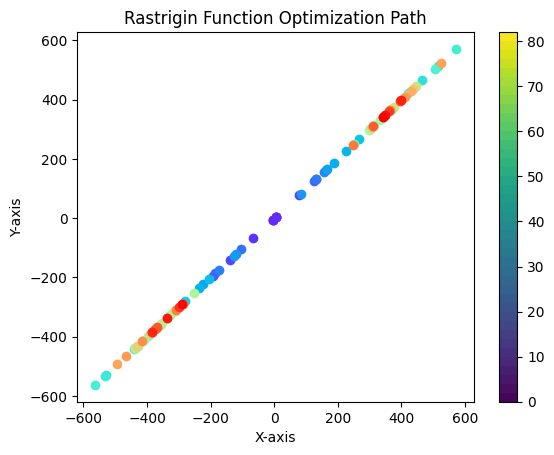

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Rastrigin function definition
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Gradient of the Rastrigin function
def grad_rastrigin(x):
    A = 10
    return [2 * xi + 2 * A * np.pi * np.sin(2 * np.pi * xi) for xi in x]

# Gradient Descent Function
def gd(**kw):
    kwd = lambda key, default: kw[key] if key in kw else default

    # REQUIRED FIELDS
    f = kw['f']
    g = kw['grad']
    x0 = kw['x0']

    # OPTIONAL FIELDS
    tau = kwd('tau', 1e-15)
    alpha = kwd('alpha', 1.0)
    max_iter = kwd('max_iter', 100)
    verbose = kwd('verbose', True)

    # Setup iteration variables
    x = x0

    # Setup return values
    x_history = [x]
    f_history = [f(x)]

    it = 0
    while it < max_iter:
        grad = g(x)

        # Update step with a simple fixed step size (can be replaced with backtracking)
        x = x - alpha * np.array(grad)

        # Store history
        x_history.append(x)
        f_history.append(f(x))

        # Print debug info
        if verbose:
            print(f'Iteration {it}: x={x}, f(x)={f_history[-1]}')

        if np.linalg.norm(grad) < tau:
            print(f'Gradient norm {np.linalg.norm(grad)} < {tau}...breaking')
            break

        it += 1

    return {'x': x_history[-1], 'val': f_history[-1], 'x_history': x_history, 'f_history': f_history}

# Make plots -- no modifications needed
def plot_progress(f, x_history, output_name, num_levels=50):
    if len(x_history) == 0:
        raise Exception('Empty history list...cannot plot')

    x_coords = [e[0] for e in x_history]
    y_coords = [e[1] for e in x_history]

    X, Y = np.meshgrid(np.linspace(-5.12, 5.12, 400), np.linspace(-5.12, 5.12, 400))

    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = f(np.array([X[i][j], Y[i][j]]))

    plt.figure()
    bar = plt.contourf(X, Y, Z, num_levels)
    plt.colorbar(bar)

    colors = cm.rainbow(np.linspace(0, 1, len(x_history)))
    for xx, c in zip(x_history, colors):
        plt.scatter(xx[0], xx[1], color=c)

    plt.title('Rastrigin Function Optimization Path')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.savefig(f'{output_name}.pdf')

# Example usage
if __name__ == "__main__":
    initial_point = np.array([5.0, 5.0])  # Starting point for optimization
    result = gd(f=rastrigin, grad=grad_rastrigin, x0=initial_point)

    plot_progress(rastrigin, result['x_history'], 'rastrigin_optimization_path')
